<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/medical2.png?raw=true" width=800 align="left"/>

# 실습 내용

- 다양한 알고리즘으로 모델을 만들고 성능을 예측합니다.
- 성능이 좋을 것으로 판단된 모델의 성능을 튜닝합니다.
- 튜닝된 모델의 성능을 평가합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [178]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import sklearn.ensemble

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [179]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/insurance.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

- 의료비를 예측하는 것이다.

In [180]:
# 데이터 살펴보기
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**데이터 설명**

- age: 나이
- sex: 성별(female, male)
- bmi: 체질량지수(체중을 키의 제곱으로 나눈 값, 적정수준:18.5 - 24.9)
- children: 자녀 수
- smoker: 흡연 여부
- region: 거주지역(northeast, southeast, southwest, northwest)
- charges: 건강보험에서 지불한 의료비 - Target

In [181]:
# 기술통계 확인
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [182]:
# target 확인
target = 'charges'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

print(x.shape, y.shape)

(1338, 6) (1338,)


**2) 가변수화**

In [183]:
# 가변수화 대상: sex, smoker, region
dumm_cols = ['sex', 'smoker', 'region']

# 가변수화
x = pd.get_dummies(x, columns=dumm_cols, drop_first=True)

# 확인
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


**3) 학습용, 평가용 데이터 분리**

In [184]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [185]:
x_train.shape, y_train.shape

((936, 8), (936,))

**4) 정규화**

In [186]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)
# 정규화
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)


# 4.성능 예측

- 여러 알고리즘으로 모델을 만들고 K-Fold CV로 성능을 예측합니다.
- 하이퍼파라미터를 설정하지 않고 진행합니다.
- 각 모델의 성능 정보를 수집해 마지막에 비교합니다.

In [187]:
# xgboost 설치
# pip install xgboost

In [188]:
# lightgbm 설치
# pip install lightgbm

- 이후 사용할 함수를 모두 불러옵니다.

In [189]:
# 불러오기
# 1. Linear Regression
from sklearn.linear_model import LinearRegression
# 2. KNN
from sklearn.neighbors import KNeighborsRegressor
# 3. Decision Tree
from sklearn.tree import DecisionTreeRegressor
# 4. SVM
from sklearn.svm import SVR
# 5. Random Forest
from sklearn.ensemble import RandomForestRegressor
# 6. XGBoost
from xgboost import XGBRegressor
# 7. LightGBM
from lightgbm import LGBMRegressor

# 성능평가 지표
from sklearn.metrics import mean_absolute_error, r2_score

# k-fold
from sklearn.model_selection import KFold

# pipeline
from sklearn.pipeline import make_pipeline

# 성능 튜닝
from sklearn.model_selection import cross_val_score, GridSearchCV

# 시각화
import matplotlib.pyplot as plt

**1) Linear Regression**

- Linear Regression 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [194]:
# 선언하기
modelLr = LinearRegression()
modelLr.fit(x_train, y_train)

LinearRegression()

In [197]:
# 성능예측
cv_score = cross_val_score(modelLr, x_train, y_train, cv=5, scoring='neg_mean_absolute_error')

In [198]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[-4422.14632506 -3837.95766596 -4156.09336115 -4450.45985763
 -4197.0764283 ]
-4212.746727620948


In [199]:
# 결과수집
result = {}
result['Linear Regression'] = cv_score.mean()

**2) KNN**

- KNN 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [200]:
# 선언하기
modelKnn = KNeighborsRegressor()

In [201]:
# 성능예측
modelKnn.fit(x_train_s, y_train)
cv_score = cross_val_score(modelKnn, x_train_s, y_train, cv=5, scoring='neg_mean_absolute_error')

In [202]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[-3917.0350864  -3755.82294142 -4045.98378225 -4062.59398653
 -3991.0648715 ]
-3954.500133620319


In [203]:
# 결과수집
result['KNN'] = cv_score.mean()

**3) Decision Tree**

- Decision Tree 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [204]:
# 선언하기
modeldt = DecisionTreeRegressor(max_depth=5)
modeldt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [205]:
# 성능예측
cv_score = cross_val_score(modeldt, x_train, y_train, cv=5, scoring='neg_mean_absolute_error')

In [206]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[-3047.52331077 -2706.07993356 -2969.29277133 -3027.69044055
 -2462.20530435]
-2842.5583521121184


In [207]:
# 결과수집
result['Decision Tree'] = cv_score.mean()

**4) SVM**

- SVM 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [208]:
# 선언하기
modelSvm = SVR()
modelSvm.fit(x_train, y_train)

SVR()

In [209]:
# 성능예측
cv_score = cross_val_score(modelSvm, x_train_s, y_train, cv=5, scoring='neg_mean_absolute_error')

In [210]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[-8579.57419953 -8435.7210833  -7674.94874436 -8335.48730629
 -9195.88610735]
-8444.323488167554


In [211]:
# 결과수집
result['SVM'] = cv_score.mean()

**5) Random Forest**

- Random Forest 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [212]:
# 선언하기
modelRf = RandomForestRegressor()

In [213]:
modelRf.fit(x_train, y_train)
# 성능예측
cv_score = cross_val_score(modelRf, x_train, y_train, cv=5, scoring='neg_mean_absolute_error')

In [214]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[-2949.52837319 -2681.61512926 -2851.3870289  -2915.49604527
 -2735.47136915]
-2826.6995891548736


In [215]:
# 결과수집
result['Random Forest'] = cv_score.mean()

**6) XGBoost**

- XGBoost 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [216]:
# 선언하기
modelXg = XGBRegressor()
modelXg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [217]:
# 성능예측
cv_score = cross_val_score(modelXg, x_train, y_train, cv=5, scoring='neg_mean_absolute_error')

In [218]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[-3391.02536207 -2843.71309906 -3261.38017221 -3311.7529229
 -2729.93146697]
-3107.5606046413973


In [219]:
# 결과수집
result['Xgboost'] = cv_score.mean()

**7) LightGBM**

- LightGBM 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [220]:
# 선언하기
modelGBM = LinearRegression()

In [221]:
# 성능예측
modelGBM.fit(x_train, y_train)
cv_score = cross_val_score(modelGBM, x_train, y_train, cv=5, scoring='neg_mean_absolute_error')

In [222]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[-4422.14632506 -3837.95766596 -4156.09336115 -4450.45985763
 -4197.0764283 ]
-4212.746727620948


In [223]:
# 결과수집
result['LightGBM'] = cv_score.mean()

**8) Voting**

In [224]:
from sklearn.ensemble import VotingRegressor
estimators = [('lr', LinearRegression()),
              ('dt', DecisionTreeRegressor()),
              ('knn', make_pipeline(MinMaxScaler(), KNeighborsRegressor())),
              ('rdf', RandomForestRegressor()),
              ('lgb', LGBMRegressor())]

modelVote = VotingRegressor(estimators=estimators)
modelVote.fit(x_train, y_train)

cv_score = cross_val_score(modelVote, x_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(cv_score)
print('-'*80)
print(cv_score.mean())

[-3365.14401783 -2844.83548039 -3182.98332985 -3229.65521571
 -2895.7311929 ]
--------------------------------------------------------------------------------
-3103.6698473372953


In [225]:
result['Voting'] = cv_score.mean()

**9)CatBoost**

In [227]:
from catboost import CatBoostRegressor

clf = CatBoostRegressor(
    iterations=5,
    learning_rate=0.1,

)
clf.fit(x_train, y_train)
cv_score = cross_val_score(clf, x_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(cv_score.mean())

result['CatBoost'] = cv_score.mean()

0:	learn: 11252.2221113	total: 640us	remaining: 2.56ms
1:	learn: 10463.9452688	total: 1.46ms	remaining: 2.19ms
2:	learn: 9794.6957722	total: 2.24ms	remaining: 1.49ms
3:	learn: 9107.4438201	total: 3.04ms	remaining: 758us
4:	learn: 8531.2968838	total: 3.74ms	remaining: 0us
0:	learn: 11360.9307106	total: 7.46ms	remaining: 29.9ms
1:	learn: 10576.2524274	total: 7.96ms	remaining: 11.9ms
2:	learn: 9908.2065504	total: 8.63ms	remaining: 5.75ms
3:	learn: 9211.9054178	total: 9.29ms	remaining: 2.32ms
4:	learn: 8630.6343124	total: 9.94ms	remaining: 0us
0:	learn: 11313.3365687	total: 709us	remaining: 2.84ms
1:	learn: 10529.2168689	total: 1.26ms	remaining: 1.89ms
2:	learn: 9876.1425902	total: 1.94ms	remaining: 1.29ms
3:	learn: 9203.5561515	total: 2.6ms	remaining: 650us
4:	learn: 8647.9538065	total: 3.29ms	remaining: 0us
0:	learn: 11382.5818440	total: 653us	remaining: 2.61ms
1:	learn: 10578.9469927	total: 1.14ms	remaining: 1.71ms
2:	learn: 9903.0944637	total: 1.81ms	remaining: 1.2ms
3:	learn: 9216.246

**10)Tabnet**

In [160]:
from pytorch_tabnet.tab_model import TabNetRegressor
X_train = x_train.to_numpy()
Y_train = y_train.to_numpy().reshape(-1, 1)
X_test = x_test.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [163]:
X = x.to_numpy()
Y = y.to_numpy().reshape(-1, 1)

In [156]:
# TabNet = TabNetRegressor(verbose=0, seed=42)
# TabNet.fit(X_train, Y_train, max_epochs=2000, eval_metric=['mae'])
# cv_score = cross_val_score(TabNet, X_train, Y_train, cv=5, scoring='r2')
# print(cv_score.mean())

-1.1869625759238587


In [167]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
predictions_array =[]
CV_score_array    =[]
for train_index, test_index in kf.split(X):
    X_train, X_valid = X[train_index], X[test_index]
    y_train, y_valid = Y[train_index], Y[test_index]
    regressor = TabNetRegressor(verbose=0,seed=42)
    regressor.fit(X_train=X_train, y_train=y_train,
                  eval_set=[(X_valid, y_valid)],
                  patience=300, max_epochs=2000,
                  eval_metric=['mae'])
    CV_score_array.append(regressor.best_cost)
    predictions_array.append(np.expm1(regressor.predict(X_test)))

predictions = np.mean(predictions_array,axis=0)


Early stopping occurred at epoch 1990 with best_epoch = 1690 and best_val_0_mae = 2622.29752

Early stopping occurred at epoch 1962 with best_epoch = 1662 and best_val_0_mae = 2229.00184

Early stopping occurred at epoch 1898 with best_epoch = 1598 and best_val_0_mae = 2488.48877
Stop training because you reached max_epochs = 2000 with best_epoch = 1846 and best_val_0_mae = 2430.19902

Early stopping occurred at epoch 1575 with best_epoch = 1275 and best_val_0_mae = 2797.93239


In [168]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(1)
if device == 'cuda':
    torch.cuda.manual_seed_all(1)
print (device)

cuda


In [ ]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
predictions_array =[]
CV_score_array    =[]
for train_index, test_index in kf.split(X):
    X_train, X_valid = X[train_index], X[test_index].to(device)
    y_train, y_valid = Y[train_index], Y[test_index].to(device)
    regressor = TabNetRegressor(verbose=0,seed=42)
    regressor.fit(X_train=X_train, y_train=y_train,
                  eval_set=[(X_valid, y_valid)],
                  patience=300, max_epochs=2000,
                  eval_metric=['mae'])
    CV_score_array.append(regressor.best_cost)
    predictions_array.append(np.expm1(regressor.predict(X_test)))

predictions = np.mean(predictions_array,axis=0)

In [169]:
print("The CV score is %.5f" % np.mean(CV_score_array,axis=0) )

The CV score is 2513.58391


In [237]:
result['Tabnet'] = 2513.58391 * (-1)

# 5.결과 확인

- 예측된 각 모델의 성능을 비교합니다.

In [234]:
result['CatBoost']

-6597.530291802856

In [238]:
# 성능 비교
print('=' * 40)
for m_name, score in result.items():
    print(m_name, score.round(3))
print('=' * 40)

Linear Regression -4212.747
KNN -3954.5
Decision Tree -2842.558
SVM -8444.323
Random Forest -2826.7
Xgboost -3107.561
LightGBM -4212.747
Voting -3103.67
CatBoost -6597.53


AttributeError: 'float' object has no attribute 'round'

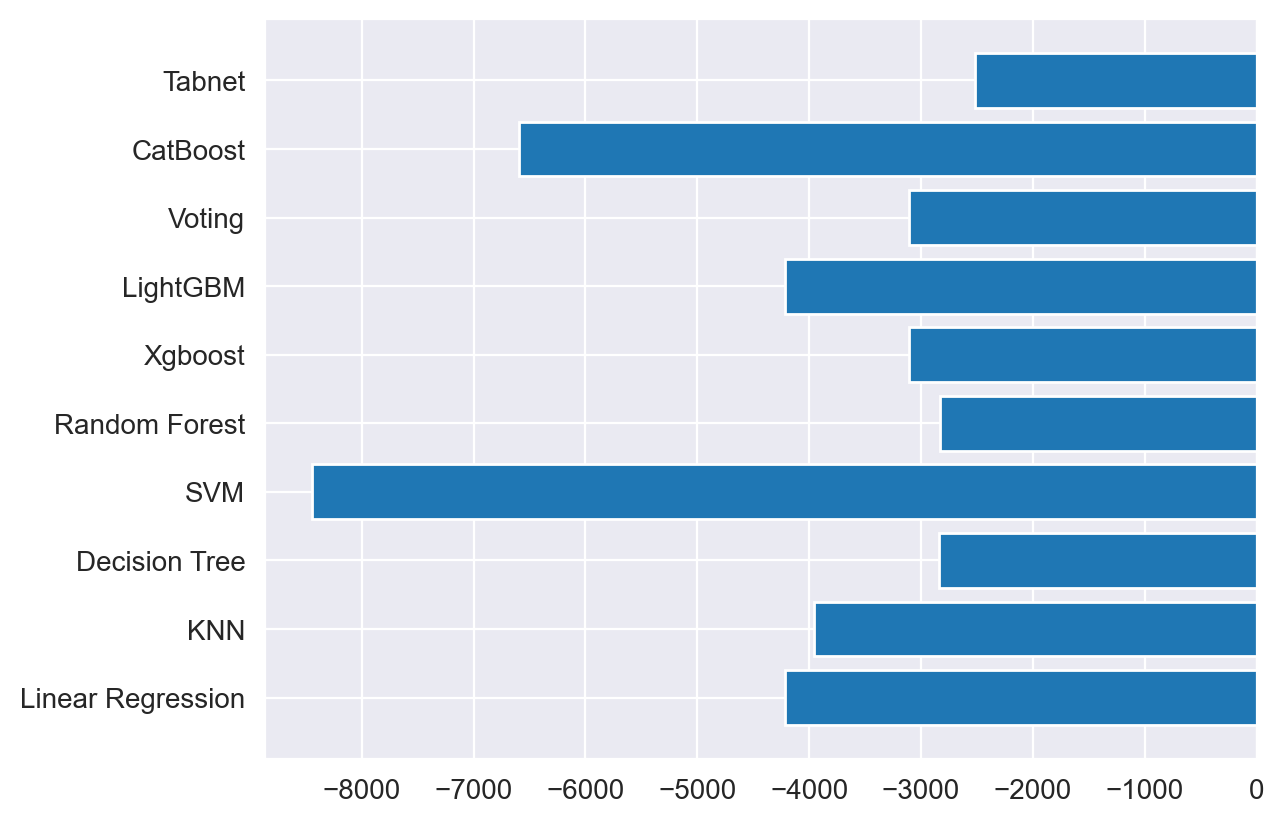

In [239]:
# 성능 시각화 비교
plt.barh(list(result.keys()), result.values())
plt.show()

# 6.성능 튜닝

- 위에서 성능이 가장 좋을 것으로 예측된 모델을 튜닝합니다.
- 본 실습에서는 Random Forest 모델 성능을 튜닝합니다.

### 1) Random Forest 성능 튜닝

In [147]:
# 기본 모델 선언
from sklearn.model_selection import GridSearchCV

# 파라미터 지정
  # max_depth: range(1, 21)
params = {
    'max_depth' : range(1, 21),

}

# 모델 선언
model = GridSearchCV(
    estimator=modelRf,
    param_grid=params,
    cv=5,
    scoring='r2',

)
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(1, 21)}, scoring='r2')

In [148]:
# 최적 파라미터, 예측 최고 성능
print("최적 파라미터:" , model.best_params_)
print("예측 최고 성능:", model.best_score_)

최적 파라미터: {'max_depth': 4}
예측 최고 성능: 0.8525089038084861


In [190]:
import optuna

def objective(trial):
    x, y = x_train.values, y_train
    rf_max_depth = int(trial.suggest_loguniform('rf_max_depth', 2, 32))
    reg_obj = RandomForestRegressor(max_depth=rf_max_depth, n_estimators=10)
    cv_score = cross_val_score(reg_obj, x, y, cv=5, scoring='r2').mean()
    return cv_score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
print(study.best_trial.params)

[I 2023-02-24 16:40:25,274] A new study created in memory with name: no-name-b9b53edb-3fc6-4cf1-8f51-81609a22c214
[I 2023-02-24 16:40:25,351] Trial 0 finished with value: 0.8453788326591238 and parameters: {'rf_max_depth': 5.474972708872103}. Best is trial 0 with value: 0.8453788326591238.
[I 2023-02-24 16:40:25,443] Trial 1 finished with value: 0.8292556579885291 and parameters: {'rf_max_depth': 8.634886358595033}. Best is trial 0 with value: 0.8453788326591238.
[I 2023-02-24 16:40:25,554] Trial 2 finished with value: 0.8148415022105574 and parameters: {'rf_max_depth': 24.507057718049357}. Best is trial 0 with value: 0.8453788326591238.
[I 2023-02-24 16:40:25,663] Trial 3 finished with value: 0.8217397701690745 and parameters: {'rf_max_depth': 13.125042844781891}. Best is trial 0 with value: 0.8453788326591238.
[I 2023-02-24 16:40:25,763] Trial 4 finished with value: 0.8208079603252021 and parameters: {'rf_max_depth': 10.192211986090307}. Best is trial 0 with value: 0.8453788326591238

{'rf_max_depth': 4.109232673212957}


In [192]:
modelOptuna = RandomForestRegressor(max_depth=4, n_estimators=10)
modelOptuna.fit(x_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=10)

In [193]:
y_pred_optuna = modelOptuna.predict(x_test)
print("예측 성능:", r2_score(y_test, y_pred_optuna))

예측 성능: 0.8566797354853786


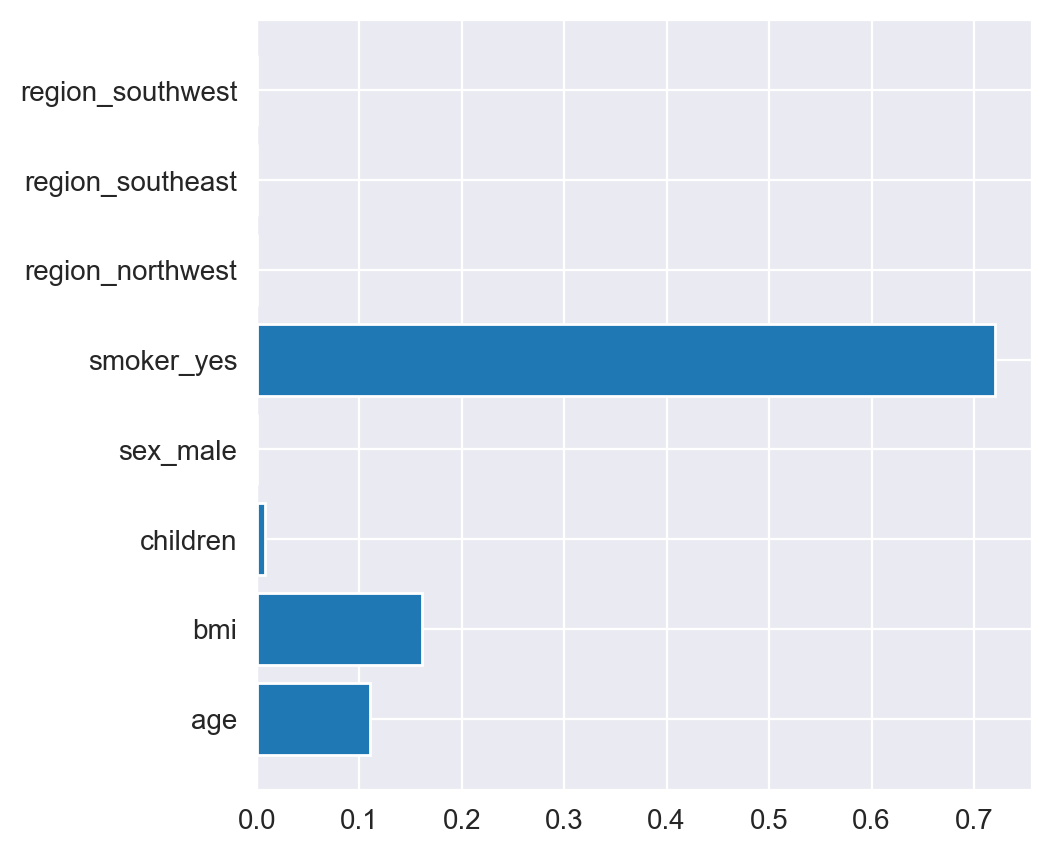

In [149]:
# 변수 중요도 시각화
plt.figure(figsize=(5, 5))
plt.barh(y=list(x), width=model.best_estimator_.feature_importances_)
plt.show()

# 7.성능 평가

- 최적 파라미터로 학습된 모델에 대해 최종 성능 평가를 진행합니다.

In [150]:
# 예측하기
y_pred = model.predict(x_test)

In [151]:
# 성능평가
print("학습 데이터 성능: ", model.score(x_train, y_train))
print("테스트 데이터 성능: ", r2_score(y_test, y_pred))

학습 데이터 성능:  0.8777161972600962
테스트 데이터 성능:  0.8563843673491857
